<a href="https://colab.research.google.com/github/rahulrajpr/AdvancedFeatureEngineering/blob/Encoding/TargetMeanEncoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
path = '/content/drive/MyDrive/Udemy Courses - 2.0/Feature Engineering/Dataset/titanic.csv'
data = pd.read_csv(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
use_cols=['Sex', 'Embarked', 'Cabin', 'Survived']

In [25]:
data = data[use_cols]

In [26]:
data['Cabin'] = data['Cabin'].str[0]

<ipython-input-26-79bad841f84d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cabin'] = data['Cabin'].str[0]


In [27]:
data.isnull().sum()

Sex           0
Embarked      2
Cabin       687
Survived      0
dtype: int64

In [28]:
for col in data.columns:
  data[col].fillna(data[col].mode()[0], inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [29]:
data.isnull().sum()

Sex         0
Embarked    0
Cabin       0
Survived    0
dtype: int64

In [30]:
X = data.drop('Survived', axis =1)
y = data['Survived']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100)

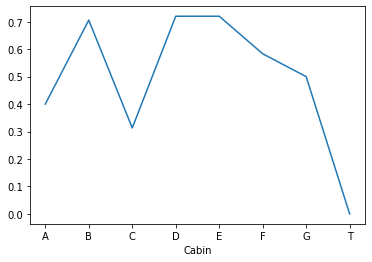

In [44]:
pd.concat([X_train,y_train], axis = 1).groupby('Cabin')['Survived'].mean().plot()
plt.show()

In [33]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
from feature_engine.encoding import MeanEncoder

In [35]:
mean_enc = MeanEncoder(variables = ['Cabin','Embarked', 'Sex'])

In [36]:
mean_enc.fit(X_train,y_train)

MeanEncoder(variables=['Cabin', 'Embarked', 'Sex'])

In [37]:
mean_enc.encoder_dict_

{'Cabin': {'A': 0.4,
  'B': 0.7058823529411765,
  'C': 0.3132295719844358,
  'D': 0.72,
  'E': 0.72,
  'F': 0.5833333333333334,
  'G': 0.5,
  'T': 0.0},
 'Embarked': {'C': 0.5575221238938053,
  'Q': 0.34615384615384615,
  'S': 0.3318777292576419},
 'Sex': {'female': 0.7318181818181818, 'male': 0.17866004962779156}}

In [45]:
mean_enc.transform(X_train)

,Sex,Embarked,Cabin
69,0.178660,0.331878,0.313230
85,0.731818,0.331878,0.313230
794,0.178660,0.331878,0.313230
161,0.731818,0.331878,0.313230
815,0.178660,0.331878,0.705882
...,...,...,...
855,0.731818,0.331878,0.313230
871,0.731818,0.331878,0.720000
835,0.731818,0.557522,0.720000
792,0.731818,0.331878,0.313230


In [46]:
X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

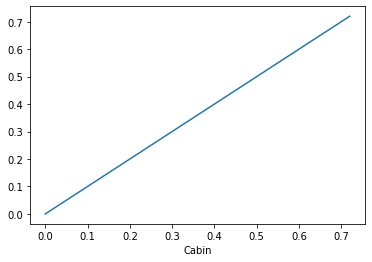

In [47]:
pd.concat([X_train,y_train], axis = 1).groupby('Cabin')['Survived'].mean().plot()
plt.show()